<a href="https://colab.research.google.com/github/MichelaMarini/MATH-6373-PyTorch-tutorial/blob/main/Autoencorders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAE and VAE
We focus on a simple **CAE** and **VAE** in PyTorch, visualizing their reconstructed inputs and latent representations after training on the MNIST dataset, respectively.

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.optim import Adam
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import precision_score
from mpl_toolkits.axes_grid1 import ImageGrid
from torchvision.utils import save_image, make_grid

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784
batch_size = 20


# MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root='../../data',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

test_dataset = torchvision.datasets.MNIST(
    root='../../data',
    train=False,
    transform=transforms.ToTensor()
)

# Data loader

train_loader = torch.utils.data.DataLoader(
   dataset=train_dataset,
   batch_size=batch_size,
   shuffle=True
)

test_loader = torch.utils.data.DataLoader(
   dataset=test_dataset,
   batch_size=batch_size,
   shuffle=False
)

100%|██████████| 9912422/9912422 [00:00<00:00, 348062447.11it/s]

Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 39612718.71it/s]


Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 183255820.15it/s]


Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19761959.30it/s]


Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw



Visualize the dataset

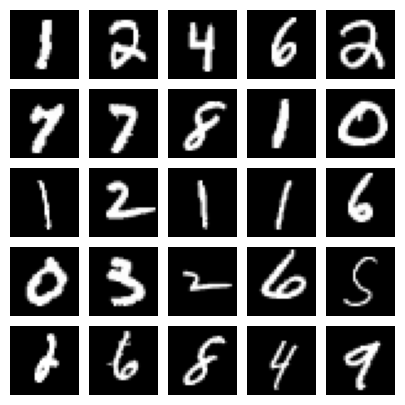

In [ ]:
# Get 25 sample training images for visualization
sample_images = []
for images, _ in train_loader:
    for i in range(len(images)):
        sample_images.append(images[i][0])  # Assuming images are of shape (batch_size, channels, height, width)
    if len(sample_images) >= 25:
        break

fig = plt.figure(figsize=(5, 5))
grid = ImageGrid(fig, 111, nrows_ncols=(5, 5), axes_pad=0.1)

for ax, im in zip(grid, sample_images):
    ax.imshow(im, cmap='gray')
    ax.axis('off')

plt.show()

# Convolutional Autoencoder **CAE**

Define the CAE architecture

<img src='https://raw.githubusercontent.com/MichelaMarini/MATH-6373-PyTorch-tutorial/main/figures/CAE_Arc.png' width=640px>


In [ ]:
class CAE(nn.Module):
    def __init__(self):
        super(CAE, self).__init__()

        # encoder
        self.encoder = nn.Sequential(

          # conv layer (depth from 1 --> 16), 3x3 kernels

          # ReLU

          # pooling layer to reduce x-y dims by two; kernel and stride of 2

          # conv layer (depth from 16 --> 4), 3x3 kernels

          # ReLU

          # pooling layer to reduce x-y dims by two; kernel and stride of 2

          )

        # decoder
        self.decoder = nn.Sequential(
            # Transpose conv layer with kernel of 2 and stride of 2 will increase the spatial dims by 2

            # ReLU

            # Transpose conv layer with kernel of 2 and stride of 2 will increase the spatial dims by 2

            # output layer (with sigmoid for scaling from 0 to 1)

            )

    def decode(self, x):
        return self.decoder(x)

    def forward(self, x):
        latent_space = self.encoder(x)
        reconstructed = self.decoder(latent_space)
        return reconstructed

# initialize the NN
model_CAE = CAE()
print(model_CAE)

CAE(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU()
    (2): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
    (3): Sigmoid()
  )
)


Training

In [ ]:
# specify loss function
criterion = nn.MSELoss()

# specify loss function
optimizer = Adam(model_CAE.parameters(), lr=0.001)

In [ ]:
# number of epochs to train the model
n_epochs = 50

for epoch in range(1, n_epochs+1):
    # training loss
    train_loss = 0.0

    ###################
    # train the model #
    ###################
    for data in train_loader:
        # _ stands in for labels, here
        # no need to flatten images
        images, _ = data
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        outputs = model_CAE(images)
        # calculate the loss
        loss = criterion(outputs, images)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*images.size(0)

    # print avg training statistics
    train_loss = train_loss/len(train_loader)
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch,
        train_loss
        ))

Epoch: 1 	Training Loss: 0.506535
Epoch: 2 	Training Loss: 0.245505
Epoch: 3 	Training Loss: 0.199324
Epoch: 4 	Training Loss: 0.184555
Epoch: 5 	Training Loss: 0.177231
Epoch: 6 	Training Loss: 0.172763
Epoch: 7 	Training Loss: 0.169760
Epoch: 8 	Training Loss: 0.167557
Epoch: 9 	Training Loss: 0.165682
Epoch: 10 	Training Loss: 0.164126
Epoch: 11 	Training Loss: 0.162877
Epoch: 12 	Training Loss: 0.161919
Epoch: 13 	Training Loss: 0.160999
Epoch: 14 	Training Loss: 0.160093
Epoch: 15 	Training Loss: 0.159334
Epoch: 16 	Training Loss: 0.158634
Epoch: 17 	Training Loss: 0.158123
Epoch: 18 	Training Loss: 0.157663
Epoch: 19 	Training Loss: 0.157284
Epoch: 20 	Training Loss: 0.156967
Epoch: 21 	Training Loss: 0.156709
Epoch: 22 	Training Loss: 0.156483
Epoch: 23 	Training Loss: 0.156234
Epoch: 24 	Training Loss: 0.156023
Epoch: 25 	Training Loss: 0.155856
Epoch: 26 	Training Loss: 0.155627
Epoch: 27 	Training Loss: 0.155500
Epoch: 28 	Training Loss: 0.155323
Epoch: 29 	Training Loss: 0.1

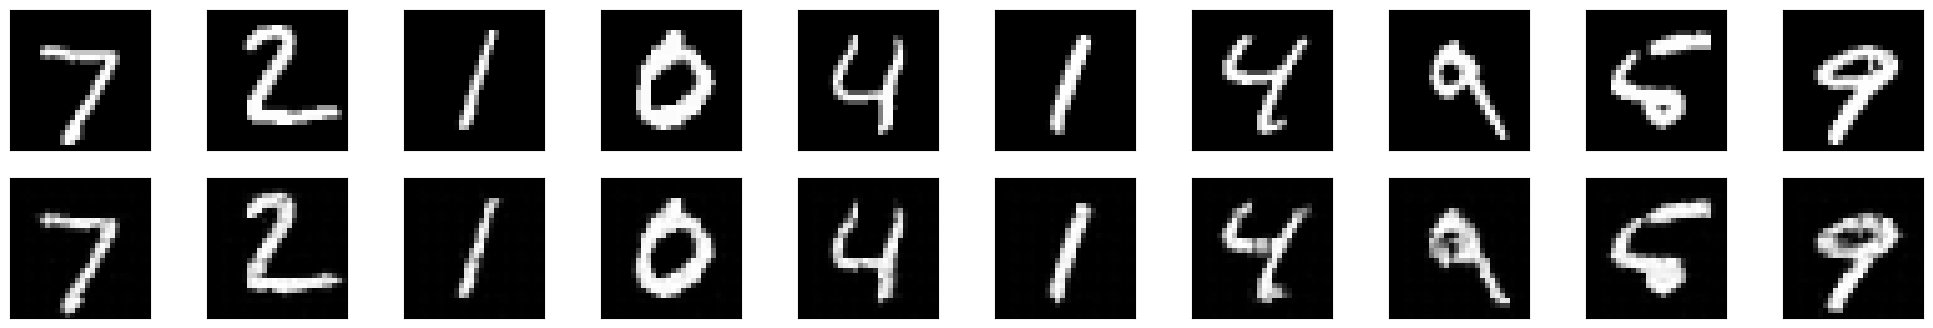

In [ ]:
# Obtain one batch of test images
for images, labels in test_loader:
    break  # Get the first batch and exit the loop

# Get sample outputs
output = model_CAE(images)

# Convert tensors to numpy arrays for display
images = images.numpy()

# Resize the output into a batch of images
output = output.view(output.size(0), 1, 28, 28).detach().numpy()

# Plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25, 4))

# Input images on the top row, reconstructions on the bottom
for imgs, row in zip([images, output], axes):
    for img, ax in zip(imgs, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.show()

# Variational Autoncoder **VAE**

Ref: https://medium.com/@rekalantar/variational-auto-encoder-vae-pytorch-tutorial-dce2d2fe0f5f

We create a simple VAE which has fully-connected encoders and decoders . The input dimension is 784 which is the flattened dimension of MNIST images (28×28). In the encoder, the mean (μ) and variance (σ²) vectors are our variational representation vectors (size=200). Notice that we multiply the latent variance with the epsilon (ε) parameter for reparameterization before decoding. This allows us to perform backpropagation and tackle the node stochasticity.

In [ ]:
class VAE(nn.Module):

    def __init__(self, input_dim=784, hidden_dim=400, latent_dim=200, device=device):
        super(VAE, self).__init__()

        # encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, latent_dim),
            nn.LeakyReLU(0.2)
            )

        # latent mean and variance
        self.mean_layer = nn.Linear(latent_dim, 2)
        self.logvar_layer = nn.Linear(latent_dim, 2)

        # decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, latent_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(latent_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
            )

    def encode(self, x):
        x = self.encoder(x)
        mean, logvar = self.mean_layer(x), self.logvar_layer(x)
        return mean, logvar

    def reparameterization(self, mean, var):
        epsilon = torch.randn_like(var).to(device)
        z = mean + var*epsilon
        return z

    def decode(self, x):
        return self.decoder(x)

    def forward(self, x):
        # encoding
        mean, logvar = self.encode(x)
        # multiply the latent variance with the epsilon (ε) parameter for reparameterization before decoding
        z = self.reparameterization(mean, logvar)
        # decoding
        x_hat = self.decode(z)
        return x_hat, mean, logvar


Training VAE

In [ ]:
model = VAE().to(device)
optimizer = Adam(model.parameters(), lr=1e-3)

In [ ]:
def loss_function(x, x_hat, mean, log_var):
    reproduction_loss = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    KLD = - 0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())

    return reproduction_loss + KLD

In [ ]:
def train(model, optimizer, epochs, device, x_dim=784):
    model.train()
    for epoch in range(epochs):
        overall_loss = 0
        for batch_idx, (x, _) in enumerate(train_loader):
            x = x.view(batch_size, x_dim).to(device)

            optimizer.zero_grad()

            x_hat, mean, log_var = model(x)
            loss = loss_function(x, x_hat, mean, log_var)

            overall_loss += loss.item()

            loss.backward()
            optimizer.step()

        print("\tEpoch", epoch + 1, "\tAverage Loss: ", overall_loss/(batch_idx*batch_size))
    return overall_loss

In [ ]:
train(model, optimizer, epochs=50, device=device)

	Epoch 1 	Average Loss:  167.85879343814474
	Epoch 2 	Average Loss:  157.13146666564637
	Epoch 3 	Average Loss:  153.981552900446
	Epoch 4 	Average Loss:  152.0538654649206
	Epoch 5 	Average Loss:  150.86870726928507
	Epoch 6 	Average Loss:  149.8808413392029
	Epoch 7 	Average Loss:  149.25500543231206
	Epoch 8 	Average Loss:  148.6236732149649
	Epoch 9 	Average Loss:  148.08477336276806
	Epoch 10 	Average Loss:  147.7949420314584
	Epoch 11 	Average Loss:  147.33776318587314
	Epoch 12 	Average Loss:  147.0360384451067
	Epoch 13 	Average Loss:  146.67699957603054
	Epoch 14 	Average Loss:  146.45120220330605
	Epoch 15 	Average Loss:  146.23490667950514
	Epoch 16 	Average Loss:  145.9690374696839
	Epoch 17 	Average Loss:  145.6990464106525
	Epoch 18 	Average Loss:  145.55243460059603
	Epoch 19 	Average Loss:  145.39339733117419
	Epoch 20 	Average Loss:  145.12232880931015
	Epoch 21 	Average Loss:  144.88472664309327
	Epoch 22 	Average Loss:  144.79746726285063
	Epoch 23 	Average Loss:  14

8529186.697265625

In [ ]:
def plot_latent_space(model, scale=5.0, n=25, digit_size=28, figsize=15):
    # display a n*n 2D manifold of digits
    figure = np.zeros((digit_size * n, digit_size * n))

    # construct a grid
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = torch.tensor([[xi, yi]], dtype=torch.float).to(device)
            x_decoded = model.decode(z_sample)
            digit = x_decoded[0].detach().cpu().reshape(digit_size, digit_size)
            figure[i * digit_size : (i + 1) * digit_size, j * digit_size : (j + 1) * digit_size,] = digit

    plt.figure(figsize=(figsize, figsize))
    plt.title('VAE Latent Space Visualization')
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("mean, z [0]")
    plt.ylabel("var, z [1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()

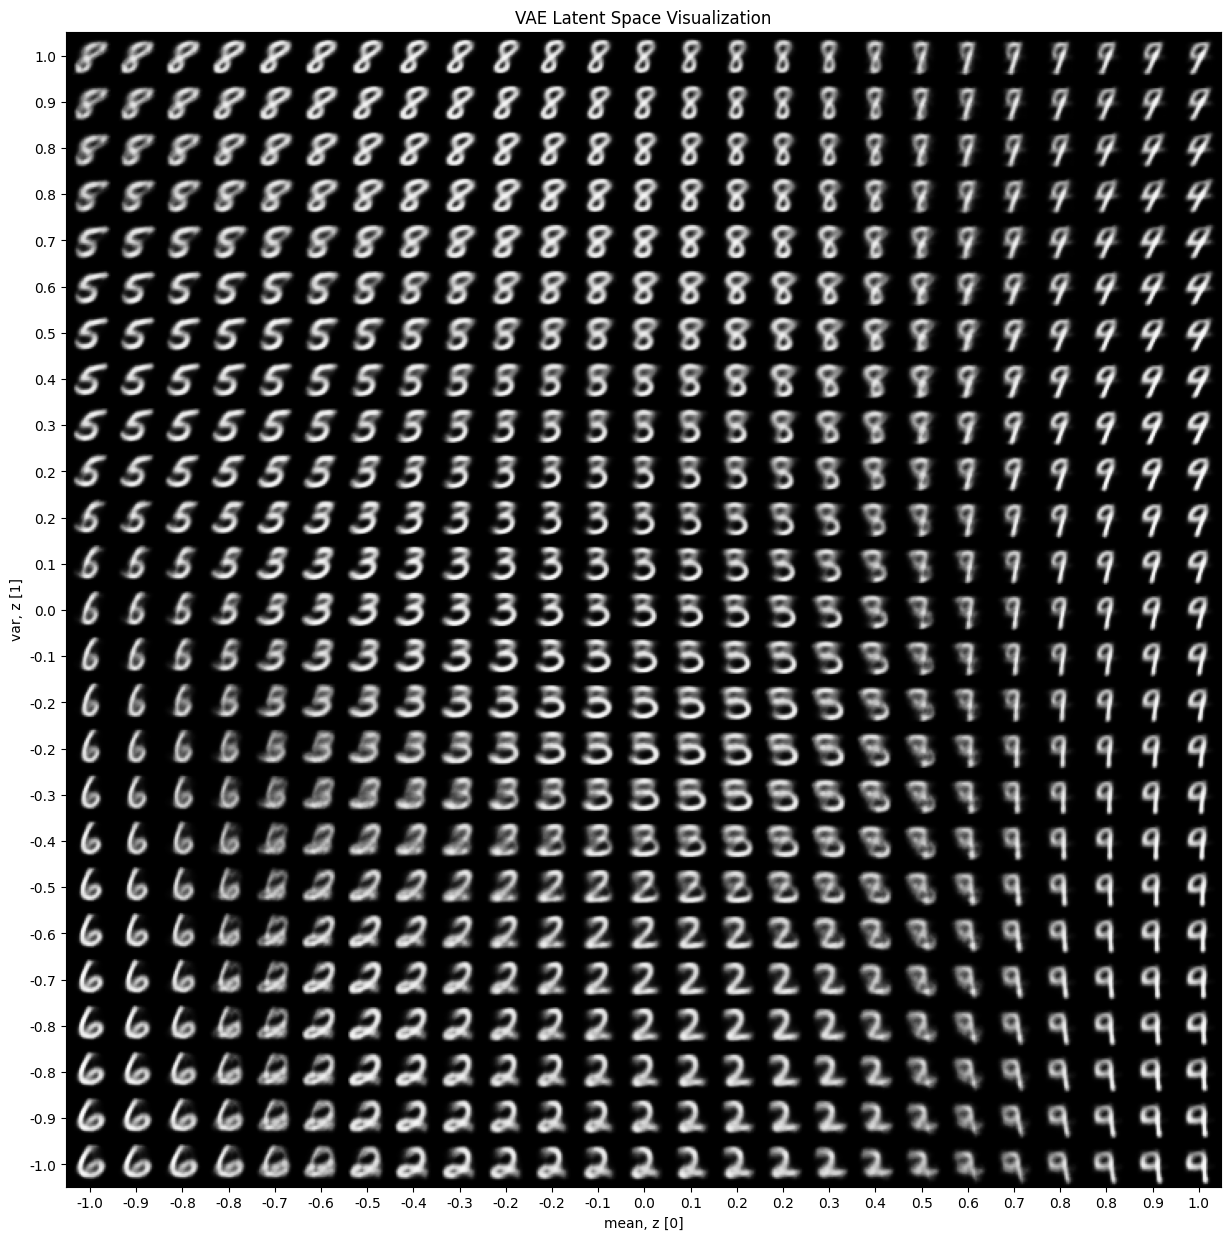

In [ ]:
plot_latent_space(model, scale=1.0)

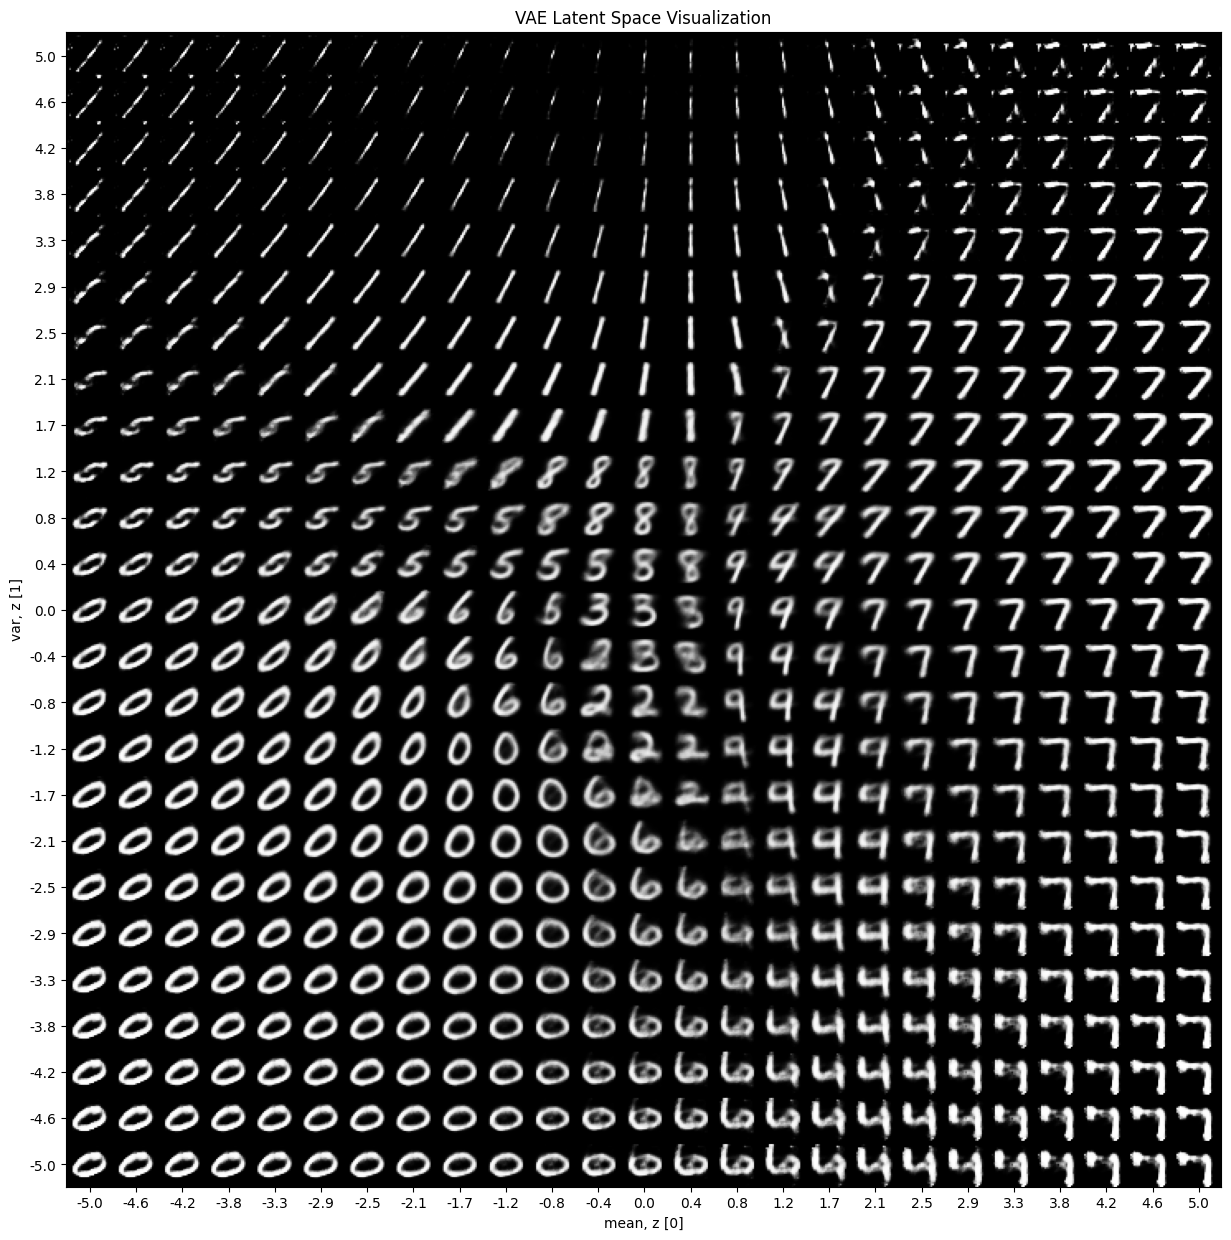

In [ ]:
plot_latent_space(model, scale=5.0)

In [ ]:
def generate_digit(model, mean, var):
    z_sample = torch.tensor([[mean, var]], dtype=torch.float).to(device)
    x_decoded = model.decode(z_sample)
    digit = x_decoded.detach().cpu().reshape(28, 28) # reshape vector to 2d array
    plt.title(f'[{mean},{var}]')
    plt.imshow(digit, cmap='gray')
    plt.axis('off')
    plt.show()

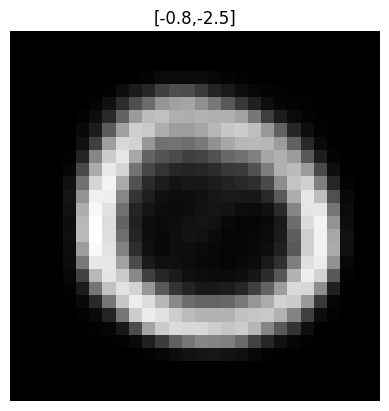

In [ ]:
generate_digit(model, -0.8, -2.5)